# Working with Time Series

## Dates and Times in Python


### Native Python dates and times: ``datetime`` and ``dateutil``

In [1]:
from datetime import datetime

In [3]:
some_day = datetime(year=2019, month = 11, day = 3 )

In [4]:
from dateutil import parser

In [5]:
some_day = parser.parse('2019-11-02')

In [8]:
some_day.strftime('%A')

'Saturday'

[strftime section](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 

[datetime documentation](https://docs.python.org/3/library/datetime.html)

[dateutil's online documentation](http://labix.org/python-dateutil)


### Typed arrays of times: NumPy's ``datetime64``

기존의 파이썬 datetime 을 보강하기 위해,  date 의 array 도 처리할 수 있게 numpy 에서 64-bit 로 처리하도록 라이브러리를 강화했음.

In [9]:
import numpy as np

In [10]:
some_day = np.array('2019-08-27', dtype=np.datetime64)

In [11]:
some_day

array('2019-08-27', dtype='datetime64[D]')

In [12]:
some_day + np.arange(31)

array(['2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30',
       '2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03',
       '2019-09-04', '2019-09-05', '2019-09-06', '2019-09-07',
       '2019-09-08', '2019-09-09', '2019-09-10', '2019-09-11',
       '2019-09-12', '2019-09-13', '2019-09-14', '2019-09-15',
       '2019-09-16', '2019-09-17', '2019-09-18', '2019-09-19',
       '2019-09-20', '2019-09-21', '2019-09-22', '2019-09-23',
       '2019-09-24', '2019-09-25', '2019-09-26'], dtype='datetime64[D]')

[NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html)

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### Dates and times in pandas: best of both worlds

In [13]:
import pandas as pd

In [24]:
date_list = ['2019, 1, 1', '2019, 1, 4', '2019, 1, 5', '2019, 1, 6']

In [25]:
idx = pd.to_datetime(date_list)

In [26]:
idx

DatetimeIndex(['2019-01-01', '2019-01-04', '2019-01-05', '2019-01-06'], dtype='datetime64[ns]', freq=None)

In [28]:
some_day + pd.to_timedelta(np.arange(10), 'D')

DatetimeIndex(['2019-08-27', '2019-08-28', '2019-08-29', '2019-08-30',
               '2019-08-31', '2019-09-01', '2019-09-02', '2019-09-03',
               '2019-09-04', '2019-09-05'],
              dtype='datetime64[ns]', freq=None)

In [29]:
some_day + pd.to_timedelta(np.arange(10), 'm')

DatetimeIndex(['2019-08-27 00:00:00', '2019-08-27 00:01:00',
               '2019-08-27 00:02:00', '2019-08-27 00:03:00',
               '2019-08-27 00:04:00', '2019-08-27 00:05:00',
               '2019-08-27 00:06:00', '2019-08-27 00:07:00',
               '2019-08-27 00:08:00', '2019-08-27 00:09:00'],
              dtype='datetime64[ns]', freq=None)

In [30]:
some_day + pd.to_timedelta(np.arange(10), 'H')

DatetimeIndex(['2019-08-27 00:00:00', '2019-08-27 01:00:00',
               '2019-08-27 02:00:00', '2019-08-27 03:00:00',
               '2019-08-27 04:00:00', '2019-08-27 05:00:00',
               '2019-08-27 06:00:00', '2019-08-27 07:00:00',
               '2019-08-27 08:00:00', '2019-08-27 09:00:00'],
              dtype='datetime64[ns]', freq=None)

In [31]:
some_day + pd.to_timedelta(np.arange(10), 'W')

DatetimeIndex(['2019-08-27', '2019-09-03', '2019-09-10', '2019-09-17',
               '2019-09-24', '2019-10-01', '2019-10-08', '2019-10-15',
               '2019-10-22', '2019-10-29'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [32]:
date_list = ['2016-07-04','2017-08-04', '2018-07-04', '2019-08-04']

In [33]:
index = pd.DatetimeIndex(date_list)

In [34]:
data = pd.Series( [100,99,80,23], index = index)

In [35]:
data

2016-07-04    100
2017-08-04     99
2018-07-04     80
2019-08-04     23
dtype: int64

In [36]:
data['2017-01-01' : '2019-08-04']

2017-08-04    99
2018-07-04    80
2019-08-04    23
dtype: int64

## Pandas Time Series Data Structures

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime

In [38]:
dates = pd.to_datetime( [ datetime(2015,7,3) , '4th of July, 2015' ,
                        '2015-Jul-6', '07-07-2015', '20150708'] )

In [39]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [40]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: ``pd.date_range()``

In [41]:
pd.date_range('2018-07-03', '2015-08-10')

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [45]:
pd.date_range('2017-07-03', periods=8)

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-08', '2017-07-09', '2017-07-10'],
              dtype='datetime64[ns]', freq='D')

In [46]:
pd.date_range('2017-07-03', periods=8, freq='H')

DatetimeIndex(['2017-07-03 00:00:00', '2017-07-03 01:00:00',
               '2017-07-03 02:00:00', '2017-07-03 03:00:00',
               '2017-07-03 04:00:00', '2017-07-03 05:00:00',
               '2017-07-03 06:00:00', '2017-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [49]:
pd.date_range('2017-07', periods=8, freq='M')

DatetimeIndex(['2017-07-31', '2017-08-31', '2017-09-30', '2017-10-31',
               '2017-11-30', '2017-12-31', '2018-01-31', '2018-02-28'],
              dtype='datetime64[ns]', freq='M')

In [50]:
pd.date_range('2018-05', periods=8, freq='M')

DatetimeIndex(['2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [51]:
pd.date_range('2018-05', periods=20, freq='B')

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-07', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-21', '2018-05-22',
               '2018-05-23', '2018-05-24', '2018-05-25', '2018-05-28'],
              dtype='datetime64[ns]', freq='B')

## Frequencies and Offsets

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

## Resampling, Shifting, and Windowing

In [32]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

### Time-shifts

shift() 는 데이터를 옮기고,

tshift() 는 date 인덱스를 옮긴다.


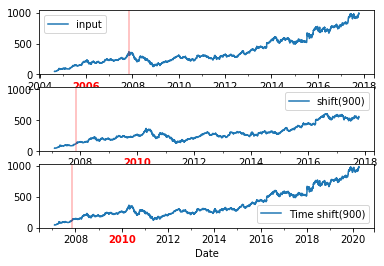

<Figure size 720x360 with 0 Axes>

In [54]:
fig, ax = plt.subplots(3, sharey=True)

goog = goog.asfreq('D', method='ffill')

goog.plot(ax = ax[0])
goog.shift(900).plot(ax = ax[1])
goog.tshift(900).plot(ax = ax[2])

local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

plt.figure(figsize=[10,5])
ax[0].legend(['input'])
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'])
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max, alpha=0.3, color='red')

ax[2].legend(['Time shift(900)'])
ax[2].get_xticklabels()[2].set(weight='heavy', color='red')
ax[2].axvline(local_max, alpha=0.3, color='red')

